<a href="https://colab.research.google.com/github/1kaiser/test2023/blob/main/IMD%20to%20CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imdlib

## upload Boundary file from [mghydro](https://mghydro.com/watersheds/)


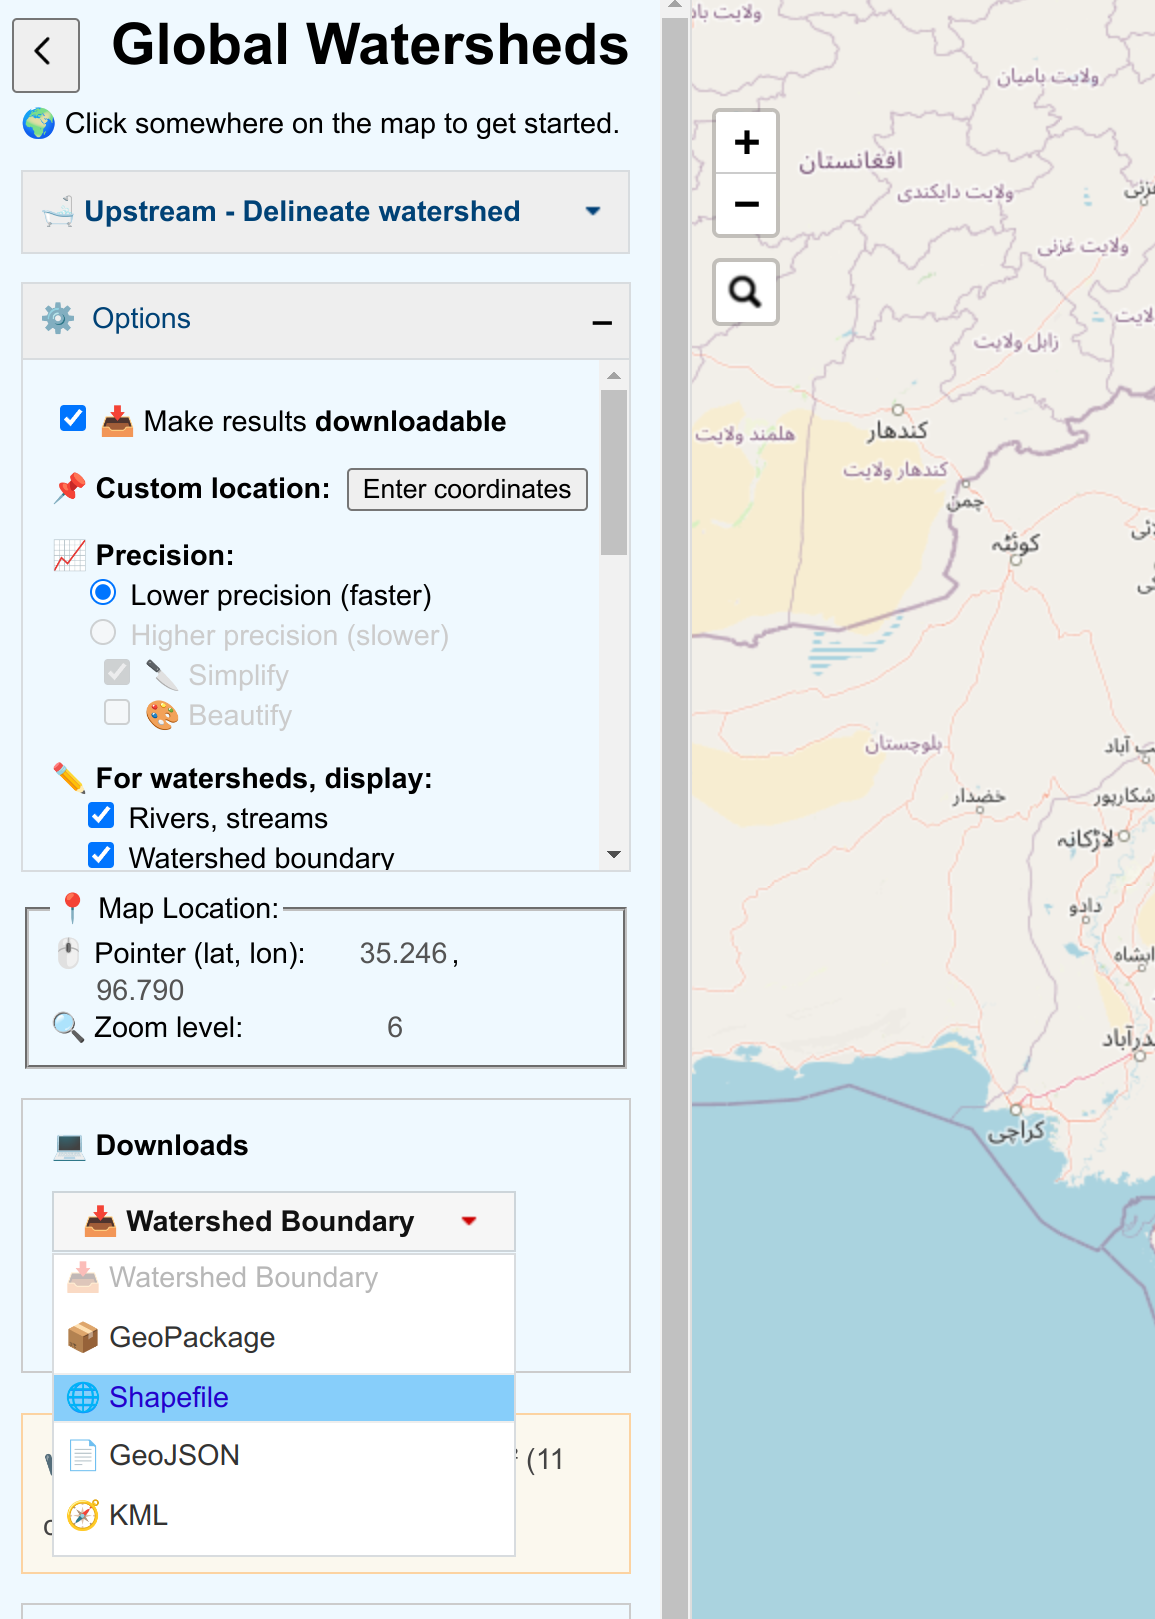

In [2]:
# @title unzip the file
zip_file = "/content/watershed.zip"# @param {type:"string"}
!unzip {zip_file}

Archive:  /content/watershed.zip
 extracting: watershed.shp           
 extracting: watershed.shx           
 extracting: watershed.dbf           
 extracting: watershed.cpg           
 extracting: watershed.prj           


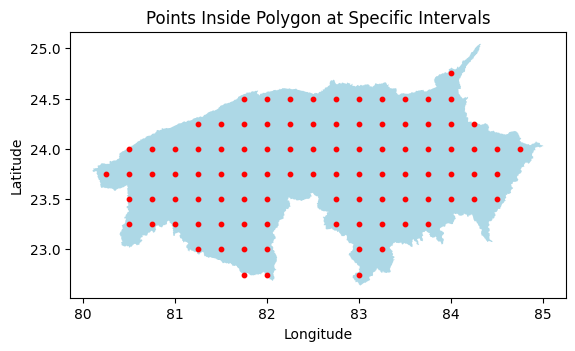

96 locations are avalilable


In [3]:
# @title Locate the shape file please { vertical-output: true }
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt

def generate_points_in_polygon(polygon, resolution):
    """Generate points within a polygon at a given resolution, ending in 0.25, 0.50, 0.75, 1.00."""
    minx, miny, maxx, maxy = polygon.bounds
    x_coords = np.arange(np.ceil(minx / resolution) * resolution, maxx, resolution)
    y_coords = np.arange(np.ceil(miny / resolution) * resolution, maxy, resolution)

    points_inside = []
    for x in x_coords:
        for y in y_coords:
            point = Point(x, y)
            if polygon.contains(point):
                points_inside.append((x, y))

    return points_inside

# Load shapefile using geopandas and transform to EPSG:4326
shapefile_path = "/content/watershed.shp" # @param {type:"string"}
gdf = gpd.read_file(shapefile_path)
if gdf.crs != 'epsg:4326':
    gdf = gdf.to_crs(epsg=4326)

# Assuming the first geometry in the GeoDataFrame is the polygon of interest
polygon = gdf.geometry[0]

# Define the resolution in degrees
resolution = 0.25  # 0.25 degrees

# Generate points within the polygon
points_inside = generate_points_in_polygon(polygon, resolution)

# Plot the polygon and the points
fig, ax = plt.subplots()
gdf.plot(ax=ax, facecolor='lightblue')  # Plot the polygon

# Unpack and plot the points
x_coords, y_coords = zip(*points_inside)
ax.scatter(x_coords, y_coords, color='red', s=10)  # s is the size of the points

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Points Inside Polygon at Specific Intervals')
plt.show()
print(str(len(points_inside))+' locations are avalilable')

In [5]:
year =
imd.get_data(variable, year, year, fn_format='yearwise')

Downloading: mintemp for year 1901
Download Successful !!!


Exception: ignored

In [ ]:
# @title Rain, Tmax, Tmin in CSV from IMD { vertical-output: true }
variable = 'tmin' #  ["rain", "tmax", "tmin"]
!rm -rf /content/{variable}



from dask import delayed, compute
import pandas as pd
import os

import imdlib as imd

start_yr = 1992 # @param {type:"slider", min:1990, max:2023, step:1}
end_yr = 2010 # @param {type:"slider", min:1990, max:2023, step:1}
file_dir = (r"/content/"+str(variable)) #Path to save the files




def download_yearly_data(variable, year):
    """Download data for a specific year."""
    return imd.get_data(variable, year, year, fn_format='yearwise')

# Create a list of delayed tasks, one for each year
tasks = [delayed(download_yearly_data)(variable, year) for year in range(start_yr, end_yr + 1)]

# Execute tasks in parallel
results = compute(*tasks)

# 'results' will have the data for each year
data = imd.open_data(variable, start_yr, end_yr,'yearwise', file_dir)

def save_lat_lon_to_csv(lat, lon, file_dir):
    """Save latitude and longitude to a CSV file."""
    data.to_csv(str(variable)+".csv", lat, lon, file_dir)

Output_folder_name = "hello" # @param {type:"string"}
save_file_dir = "/content/"+str(Output_folder_name)

!rm -rf {save_file_dir}
!mkdir -p {save_file_dir}

# Parallelize saving each point using Dask
save_tasks = []
for i, (lon, lat) in enumerate(points_inside):
    task = delayed(save_lat_lon_to_csv)(lat, lon, save_file_dir)
    save_tasks.append(task)

# Execute CSV converstion in parallel
compute(*save_tasks)

#zipping the files in a zip
%cd {save_file_dir}
%cd ..
!zip -r folder.zip {save_file_dir}
%cd /content
print('files zipped!')

Downloading: mintemp for year 1998
Downloading: mintemp for year 1997
Download Successful !!!
Downloading: mintemp for year 1999
Download Successful !!!
Downloading: mintemp for year 1995
Download Successful !!!
Downloading: mintemp for year 1996
Download Successful !!!
Downloading: mintemp for year 2007
Download Successful !!!
Downloading: mintemp for year 1994
Download Successful !!!
Downloading: mintemp for year 2004
Download Successful !!!
Downloading: mintemp for year 1992
Download Successful !!!
Downloading: mintemp for year 2003
Download Successful !!!
Downloading: mintemp for year 2008
Download Successful !!!
Downloading: mintemp for year 2002
Download Successful !!!
Downloading: mintemp for year 2000
Download Successful !!!
Downloading: mintemp for year 2009


In [6]:
# @title connect google drive to make files offline, zip will be located in google drive 1-2 min
from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/folder.zip /content/drive/MyDrive

Mounted at /content/drive
